<a href="https://colab.research.google.com/github/savithavivekm/Deep-learning/blob/main/Hyper_parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>## **HYPER PARAMETER TUNING IN NEURAL NETWORK**

What is Hyperparameter ???

Hyperparameters are the variables which determines the network structure(Eg: Number of Hidden Units) and the variables which determine how the network is trained(Eg: Learning Rate).

Hyperparameter Tuning

Hyperparameter tuning  or optimization is choosing a set of optimal hyperparameters for a learning algorithm.

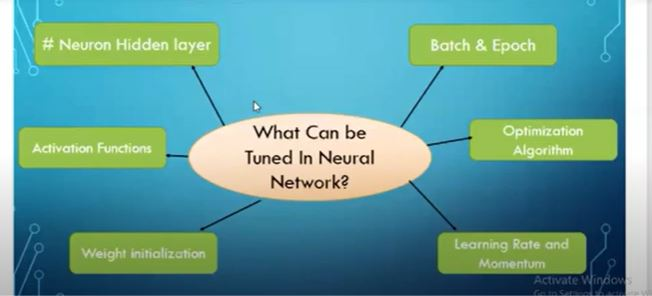

###Hyperparameter Tuning techniques in Neural network

Top 8 Approaches For Tuning Hyperparameters Of Machine Learning Models

1| Bayesian Optimisation

2| Evolutionary Algorithms

3| Gradient-Based Optimisation

4| Grid Search

5| Keras' Tuner

6| Population-based Optimisation

7| ParamILS

8| Random Search

Some of the best Hyperparameter Optimization libraries are:

Scikit-learn (grid search, random search)

Hyperopt

Scikit-Optimize

Optuna

Ray.tune

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.

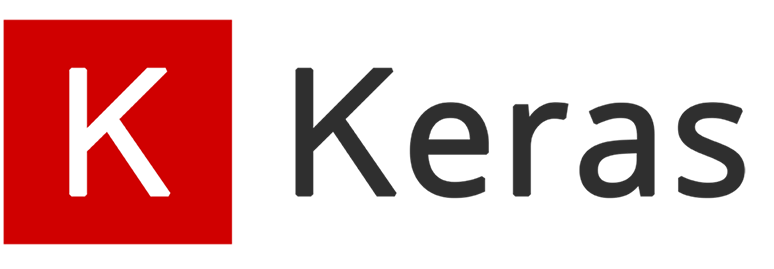

###Importing necessary packages

In [1]:
import numpy
import pandas as pd
import warnings
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

###Part 1 - Tuning Batch and Epoch

In [2]:
#load the dataset for india diabetes
data=pd.read_csv('/content/diabetes.csv')

In [3]:
#viewing the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split into predictors and response
X=data.iloc[:,0:8]#predictors
Y=data.iloc[:,8]#response

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
#Functions to create model for KerasClassifier
def create_my_model():
  #defining my model
  mymodel=Sequential()
  mymodel.add(Dense(12,input_dim=8,activation='relu'))
  mymodel.add(Dense(1,activation='sigmoid'))
  #compile the model
  mymodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return mymodel

In [16]:
#create model
model=KerasClassifier(build_fn=create_my_model)

In [17]:
model

In [18]:
#define the grid search parameters
batchsize=[10,20,40,60,80,100]
epochs=[10,30,50]


In [19]:
parameter_grid=dict(batch_size=batchsize,epochs=epochs)
mygrid=GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=3)
grid_result=mygrid.fit(X,Y)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 31.5430 - accuracy: 0.6497
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 8.9782 - accuracy: 0.6120
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 4.0138 - accuracy: 0.5430
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 2.2705 - accuracy: 0.5169
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 1.4111 - accuracy: 0.6003
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 1.0812 - accuracy: 0.6133
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9121 - accuracy: 0.6393
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 0.8477 - accuracy: 0.6615
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7928 - accuracy: 0.6576
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7785 - accuracy: 0.6471
Epoch 11/50
77/77 

In [20]:
#Summarize results
print("BEST : %f using %s " %(grid_result.best_score_,grid_result.best_params_))

BEST : 0.667969 using {'batch_size': 10, 'epochs': 50} 


###Part 2 - Optimization of Activation Function

In [21]:
#function to create model
def create_my_model(optimizer='adam'):
  #create model
  mymodel=Sequential()
  mymodel.add(Dense(12,input_dim=8,activation='relu'))
  mymodel.add(Dense(1,activation='sigmoid'))
  #compile the model
  mymodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return mymodel


In [22]:
#create model
model=KerasClassifier(build_fn=create_my_model,epochs=50,batch_size=10)

In [23]:
#Define the grid search parameters
optimizer=['SGD','Adabelta','RMSprop','Adagrad','Adam']
parameter_grid=dict(optimizer=optimizer)

In [24]:
grid=GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=3)
grid_result=grid.fit(X,Y)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 12.0928 - accuracy: 0.4701
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 6.0083 - accuracy: 0.5378
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 2.0212 - accuracy: 0.5547
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 1.2471 - accuracy: 0.5898
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 1.0423 - accuracy: 0.5807
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9440 - accuracy: 0.5781
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.9070 - accuracy: 0.5768
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 0.8641 - accuracy: 0.5807
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 0.8156 - accuracy: 0.5807
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7961 - accuracy: 0.5820
Epoch 11/50
77/77 

In [28]:
print("Best optimizer: %s and score : %f "%(grid_result.best_params_,grid_result.best_score_))

Best optimizer: {'optimizer': 'Adam'} and score : 0.687500 
